In [199]:
import random
import matplotlib.pyplot as plt

In [200]:
num=random.normalvariate(0.5,0.15)*10

In [270]:
NUMPERSONS = 1000
PCTIMMUNE = 1
DAYSCONTAG = 7
NUMFRIENDS = 5
STARTING_INFECTERS = 1

In [277]:
people = []
for i in range(NUMPERSONS):
    immune = False
    contagness = 0
    mask = False
    days_contag = 0
    friends = int(round(random.normalvariate(0.5,0.15)*2*NUMFRIENDS,0))
    if random.randint(0,100) < PCTIMMUNE:
        immune = True
    person = [immune,contagness,days_contag,friends,mask]
    people.append(person)

In [278]:
for i in range(STARTING_INFECTERS):
    contag = random.normalvariate(0.5,0.15) * 100
    index = random.randint(0,NUMPERSONS-1)
    while people[index][1] > 0:
        index = random.randint(0,NUMPERSONS-1)
    people[index][1] = contag

In [283]:
def run_day(lockdown=False):
    for person in people:
        if person[1] == 0:
            continue
        max_num_gather = int(person[2] / 2)
        people_met = random.randint(0,max_num_gather)
        if lockdown:
            people_met = 0#int(people_met / 2)
        for i in range(people_met):
            index = random.randint(0,NUMPERSONS-1)
            if people[index][1] > 0 or people[index][0]:
                continue
            contag = person[1]
            if person[1][-1]:
                contag /= 2
            if random.randint(0,100) < person[1]:
                people[index][1] = random.normalvariate(0.5,0.15) * 100
                #print("Person infected!")
        person[2] += 1
        if person[2] > DAYSCONTAG:
            person[1] = 0
            person[0] = True

In [280]:
num_cases = []
for i in range(100):
    lockdown = False
    if i==15:
        lockdown=1
    run_day(lockdown)
    num_cases.append(len([p for p in people if p[1] > 0]))

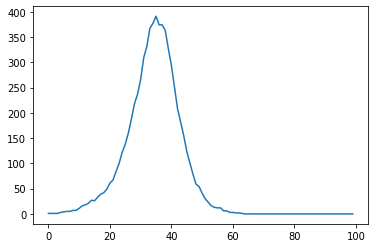

In [281]:
plt.plot(num_cases)

In [282]:
sum(num_cases)

6848